In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.layers import Input, Dense
from keras.models import Model
from keras import losses
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

#Define Load embed
def load_embed(ind):
    doc_embed   = tf.constant(np.load(f"embeds_a/doc_embed_a{ind}.npy"))
    word_embed  = tf.constant(np.load(f"embeds_a/word_embed_a{ind}.npy"))
    topic_embed = tf.constant(np.load(f"embeds_a/topic_embed_a{ind}.npy"))
    return (doc_embed, word_embed, topic_embed)

#Define Topic Dist
def topic_dist(ind):
    embeds = load_embed(ind)
    doc_embed = embeds[0]
    topic_embed = embeds[2]
    norm_doc = tf.nn.softmax(doc_embed)
    topic_dist = tf.linalg.matmul(norm_doc, topic_embed)
    return topic_dist

Using TensorFlow backend.


In [2]:
#Load Data
data = topic_dist(2)
print(data.shape)
#Remove last 10 rows (aka 2017. Cant predict 2018 without data)
inputs = data[:-1, :]
print(inputs.shape)
#Remove first 1 row (aka 2008. Cant predict to 2008 without prev data)
outputs = data[1:, :]
print(outputs.shape)

(100, 300)
(99, 300)
(99, 300)


Epoch 1/50
10/10 [==============================] - 1s 102ms/step - loss: 0.0189 - cosine_similarity: 0.3836
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0119 - cosine_similarity: 0.6397
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0096 - cosine_similarity: 0.7010
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0086 - cosine_similarity: 0.7299
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0080 - cosine_similarity: 0.7458
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0077 - cosine_similarity: 0.7502
Epoch 7/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0076 - cosine_similarity: 0.7502
Epoch 8/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0075 - cosine_similarity: 0.7482
Epoch 9/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0074 - cosine_similarity: 0.7452
Epoch 10/50
10/10 [================

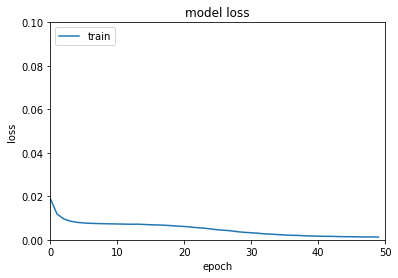

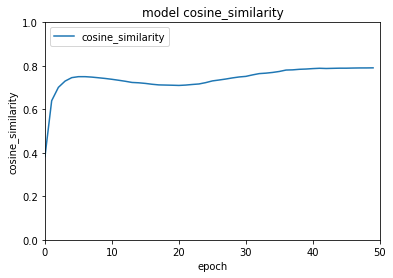

In [3]:
input_size = 300
hidden_size1 = 300
hidden_size2 = 300
output_size = 300

input_data = Input(shape=(input_size,))
hidden_d_1 = Dense(hidden_size1, activation='tanh')(input_data)
hidden_d_2 = Dense(hidden_size2, activation='tanh')(hidden_d_1)
predicted = Dense(output_size, activation='tanh')(hidden_d_2)

predictor = Model(input_data, predicted)
predictor.compile(optimizer='Adam', loss='msle', metrics=['cosine_similarity'] ) #Can also do MSE or MAE here for loss.

p = predictor.fit(inputs, outputs,
epochs=50,
steps_per_epoch=10,
shuffle=False)
#validation_data=(X_test, Y_test))

#Plotting loss
plt.plot(p.history['loss'])
#plt.plot(p.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
#plt.legend(['train', 'validation'], loc='upper left')
plt.axis([0, 50, 0, 0.1])
plt.show()

#Plotting Accuracy
plt.plot(p.history['cosine_similarity'])
#plt.plot(p.history['val_acc'])
plt.title('model cosine_similarity')
plt.ylabel('cosine_similarity')
plt.xlabel('epoch')
plt.legend(['cosine_similarity'], loc='upper left')
#plt.legend(['acc', 'val_acc'], loc='upper left')
plt.axis([0, 50, 0.0, 1.0])
plt.show()